# Lesson 1 Assignment: Research other visualizations for clustering

In this lesson, you have worked with some visualization techniques to get a grasp on plotting your data in preparation for clustering it. Scatterplots, in particular are useful for finding groups of objects. Research different ways and different libraries to create scatterplots and document your work in a notebook. You can use the data from this lesson, other lessons, or data you source yourself (please credit its source, however, in your notebook). Plot some data using scatterplots and explain what you discover.

# Scatter Plots

In this notebook, we will walk through how to make scatter plots in Python, using Matplotlib and Seaborn. We will be using the Pokemon dataset as an example.

## Data Description

### Context
This dataset contains information on all 802 Pokemon from all Seven Generations of Pokemon. The information contained in this dataset include Base Stats, Performance against Other Types, Height, Weight, Classification, Egg Steps, Experience Points, Abilities, etc. The information was scraped from http://serebii.net/



### Content
name: The English name of the Pokemon
japanese_name: The Original Japanese name of the Pokemon
pokedex_number: The entry number of the Pokemon in the National Pokedex
percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless.
type1: The Primary Type of the Pokemon
type2: The Secondary Type of the Pokemon
classification: The Classification of the Pokemon as described by the Sun and Moon Pokedex
height_m: Height of the Pokemon in metres
weight_kg: The Weight of the Pokemon in kilograms
capture_rate: Capture Rate of the Pokemon
base_egg_steps: The number of steps required to hatch an egg of the Pokemon
abilities: A stringified list of abilities that the Pokemon is capable of having
experience_growth: The Experience Growth of the Pokemon
base_happiness: Base Happiness of the Pokemon
against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type
hp: The Base HP of the Pokemon
attack: The Base Attack of the Pokemon
defense: The Base Defense of the Pokemon
sp_attack: The Base Special Attack of the Pokemon
sp_defense: The Base Special Defense of the Pokemon
speed: The Base Speed of the Pokemon
generation: The numbered generation which the Pokemon was first introduced
is_legendary: Denotes if the Pokemon is legendary.

### Loading the Data

Let's import the necessary libraries first:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We can then read the data:

In [2]:
data = pd.read_csv("data/pokemon.csv")

Let's check the shape and look at the first few rows in the DataFrame:

In [3]:
data.shape

(801, 41)

We have 801 records with 41 features

In [4]:
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


We can then check for missing values if available:

In [5]:
data.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


The data contain some missing values. But since our aim is to just visualize the relationships within the data, that will not affect our plots:

### Basic Scatter Plots
We can plot by matplotlib or seaborn. For matplotlib, we can either call the .plot.scatter() method in pandas, or use plt.scatter(). For seaborn, we use sns.scatterplot() function. As an example, we plot the defense vs attach values for 1st-generation Pokemons:

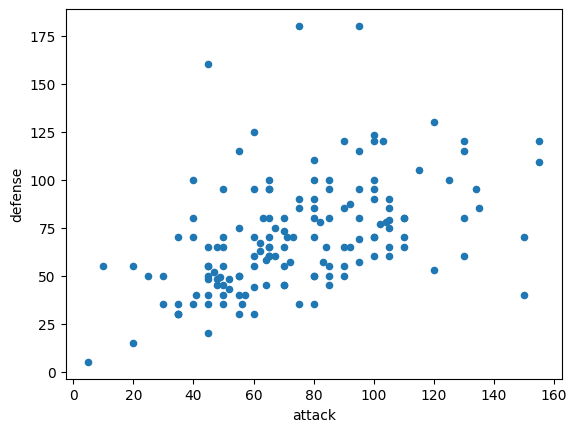

In [6]:
g1 = data.loc[data.generation==1,:]

# dataframe.plot.scatter() method
g1.plot.scatter('attack', 'defense'); # The ';' is to avoid showing a message before showing the plot

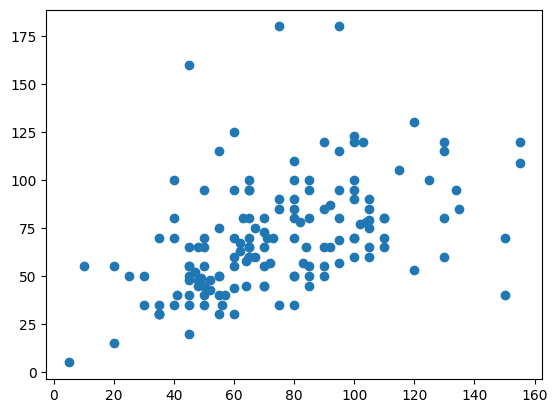

In [7]:
# plt.scatter() function
plt.scatter('attack', 'defense', data=g1);

In [ ]:
# sns.scatterplot() function
sns.scatterplot('attack', 'defense', data=g1 );

We can customize the size, color, and marker style of a plot by 's', 'c' and 'marker' arguments respectively in matplotlib. We can also specify the size of the plot:

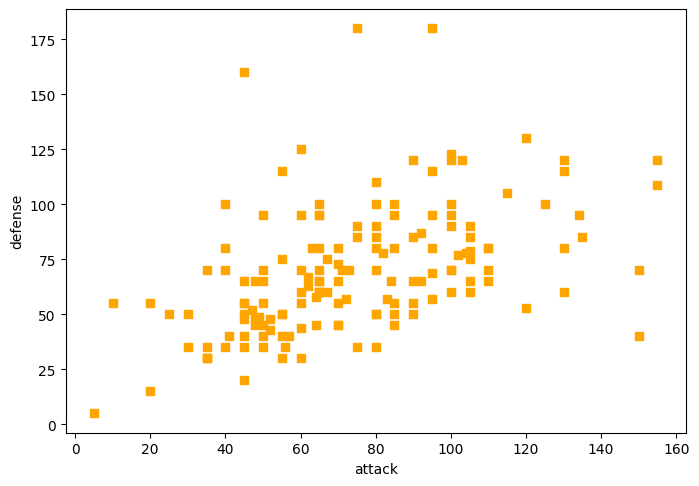

In [13]:
g1.plot.scatter('attack', 'defense', s = 40, c = 'orange', marker = 's', figsize=(8,5.5));

### Scatter Plots by Factors
Here we are going to demonstrate how to make scatter plots where the data can be separated into two or more groups, according to value of another (usually factor) varible.

In matplotlib, it is advisable to plot group by group using each subset of data:

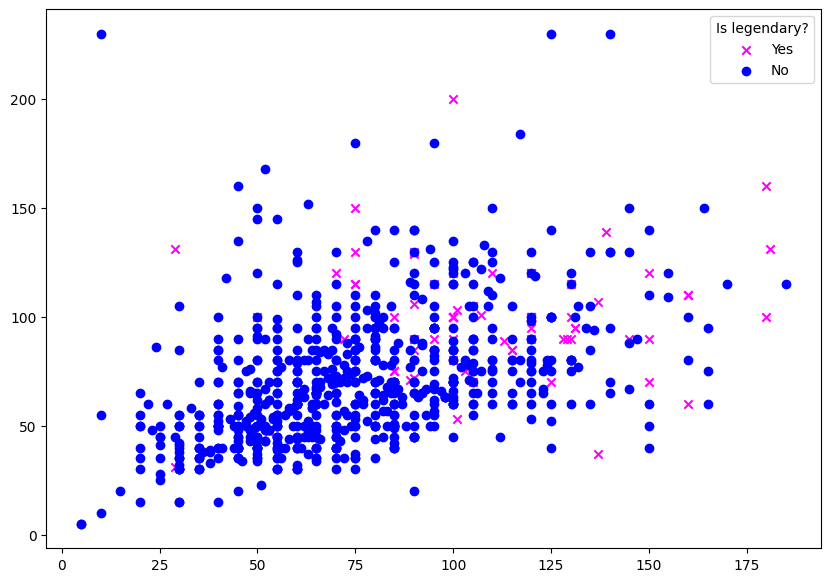

In [14]:
plt.figure(figsize=(10,7)) # Specify size of the chart
plt.scatter('attack', 'defense', data=data[data.is_legendary==1], marker = 'x', c = 'magenta')
plt.scatter('attack', 'defense', data=data[data.is_legendary==0], marker = 'o', c = 'blue')
plt.legend(('Yes', 'No'), title='Is legendary?')
plt.show()

In Seaborn, we can specify the 'hue' argument so it will automatically plot the chart using different colors for different groups, and the lengends are shown automatically:

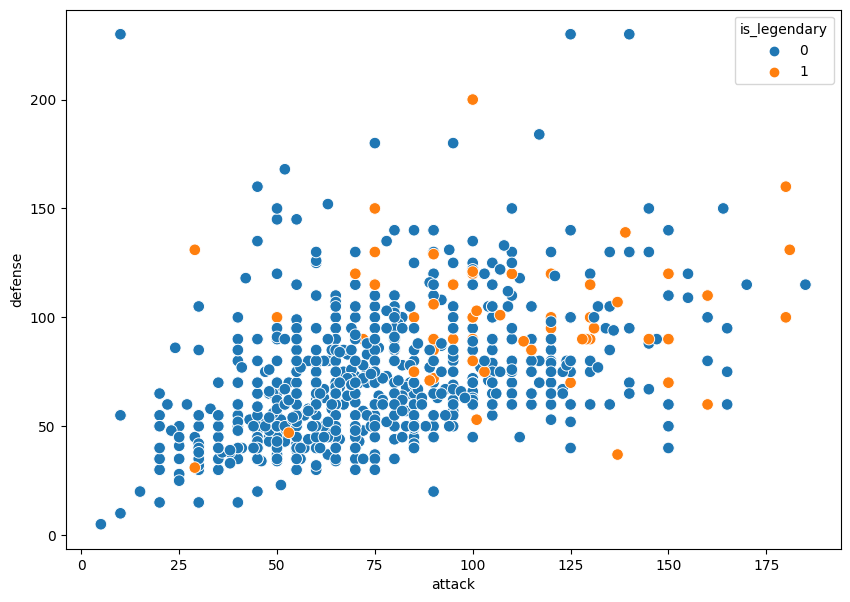

In [15]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = 'attack', y = 'defense', s = 70, hue ='is_legendary', data=data); # hue represents color

When there are many classes in the variable we want to distinguish in a chart, using Seaborn is more convenient.

In the following chart we add the title and use a larger font size for axis labels as well:

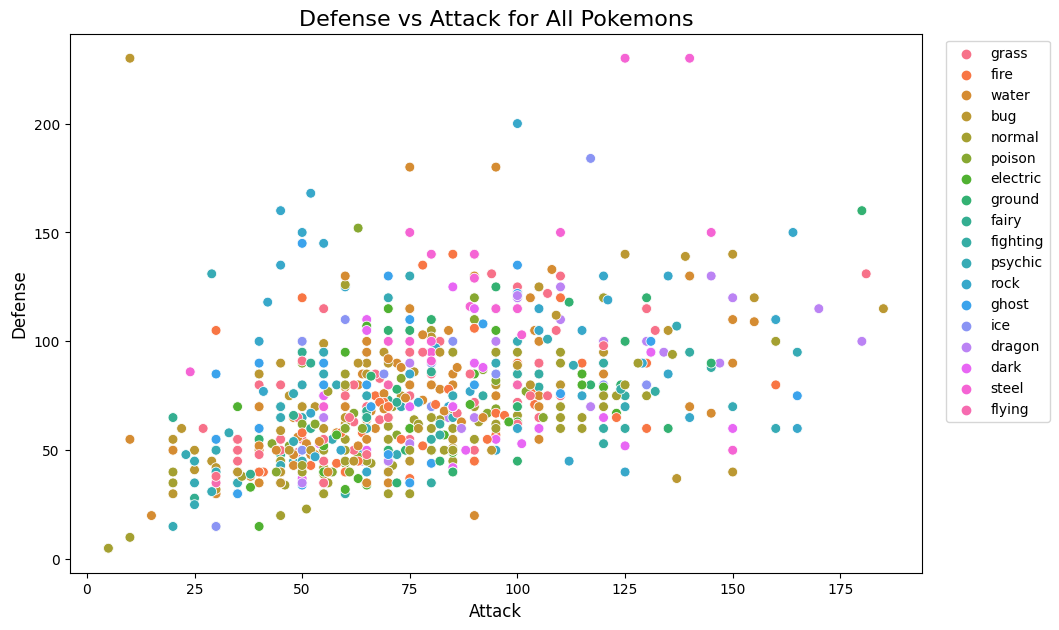

In [16]:
plt.figure(figsize=(11,7))
sns.scatterplot(x = 'attack', y = 'defense', s = 50, hue = 'type1', data=data)
plt.legend(bbox_to_anchor=(1.02, 1)) # move legend to outside of the chart
plt.title('Defense vs Attack for All Pokemons', fontsize=16)
plt.xlabel('Attack', fontsize=12)
plt.ylabel('Defense', fontsize=12)
plt.show()

### Labelling Extremes and Outliers
In scatter plots, the data points at the extremes (very low or very high) are the most eye-catching and we may want to know immediately what they are. The following part demonstrate how to annotate on the charts with necessary information. As an example, we are plotting the relationship between weight and height for 'water' type Pokemons:

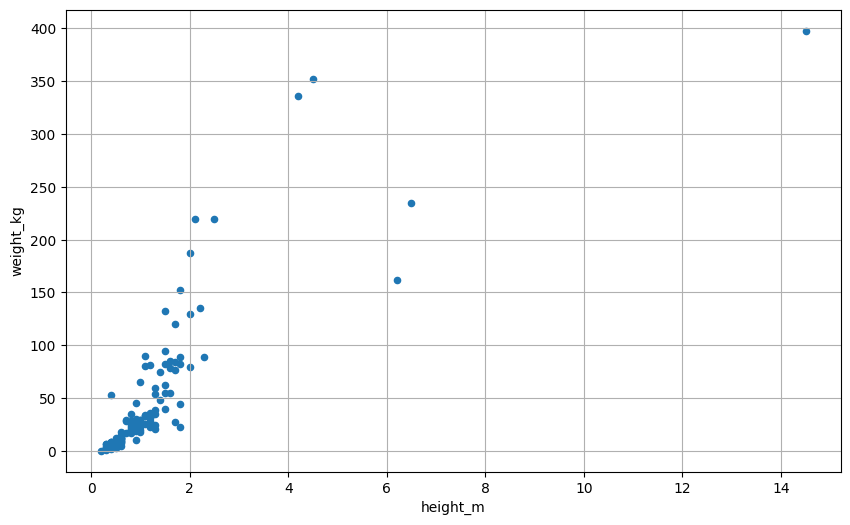

In [17]:
water = data[data.type1 == 'water']
water.plot.scatter('height_m', 'weight_kg', figsize=(10,6))
plt.grid(True) # add gridlines
plt.show()

There are a few points that are high on the x-axis. We want to show who they are in the charts by using plt.annotate() function. In addition, we modify the axes so that both have minimum of zero (after all, height and weight could not be zero!).

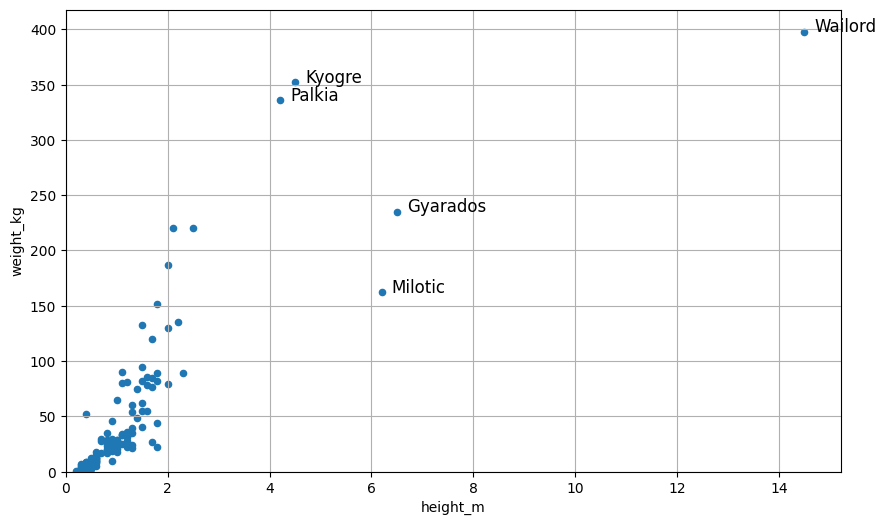

In [18]:
water.plot.scatter('height_m', 'weight_kg', figsize=(10,6))
plt.grid(True)
for index, row in water.nlargest(5, 'height_m').iterrows():
    plt.annotate(row['name'], # text to show
                 xy = (row['height_m'], row['weight_kg']), # the point to annotate 
                 xytext = (row['height_m']+0.2, row['weight_kg']), # where to show the text
                 fontsize=12)
plt.xlim(0, ) # x-axis has minimum 0
plt.ylim(0, ) # y-axis has minimum 0
plt.show()

In the above code, water.nlargest(5, 'height_m') is subsetting for the five tallest Pokemons and .iterrows() means we iterate for each row.

### Add Regression Lines
We will show how to add regression lines into the scatter plots to show the approximate linear relationships. In this example we plot the attack against speed using lmplot() function in Seaborn:

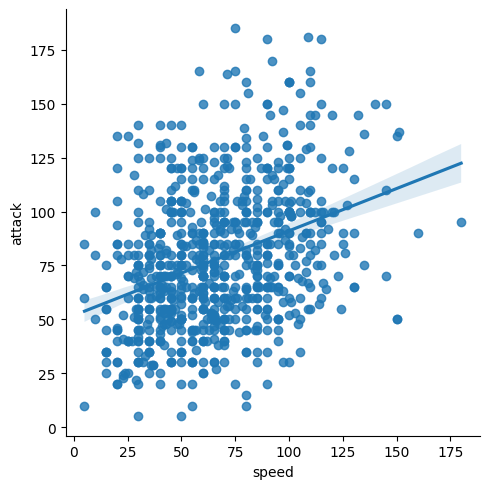

In [19]:
sns.lmplot(x = "speed", y = "attack", data=data)

Note that plt.figure() doesn't work for lmplot() charts. To specify the figure size, use height and aspect arguments inside the lmplot() function:

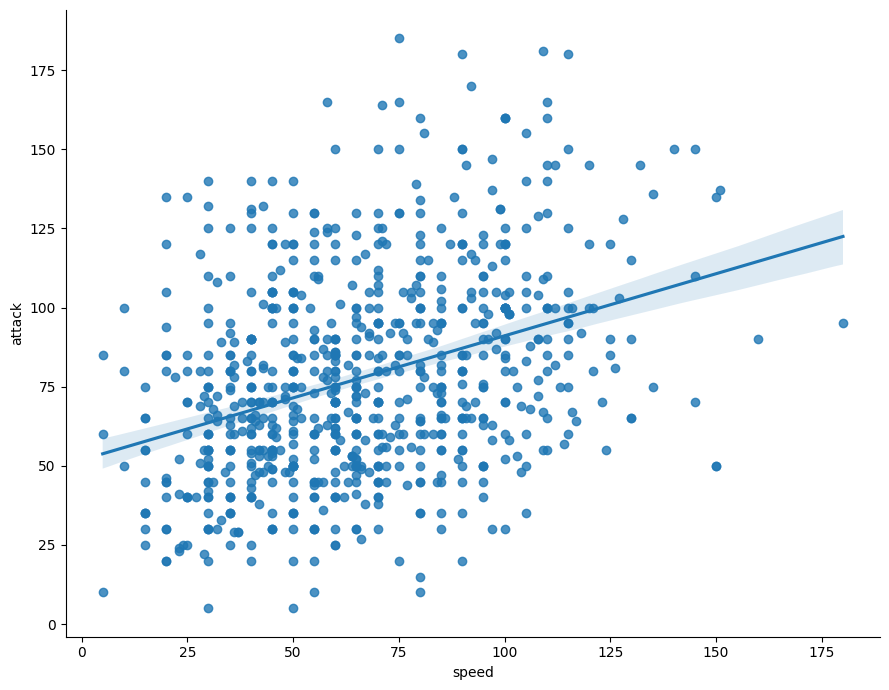

In [20]:
sns.lmplot(x = "speed", y = "attack", data=data, height = 7, aspect = 9/7); # Make a 9x7 size plot

The hue argument enables fitting separate regression lines for different groups. We also remove the shaded area around the regression lines which represents confidence intervals of estimates:

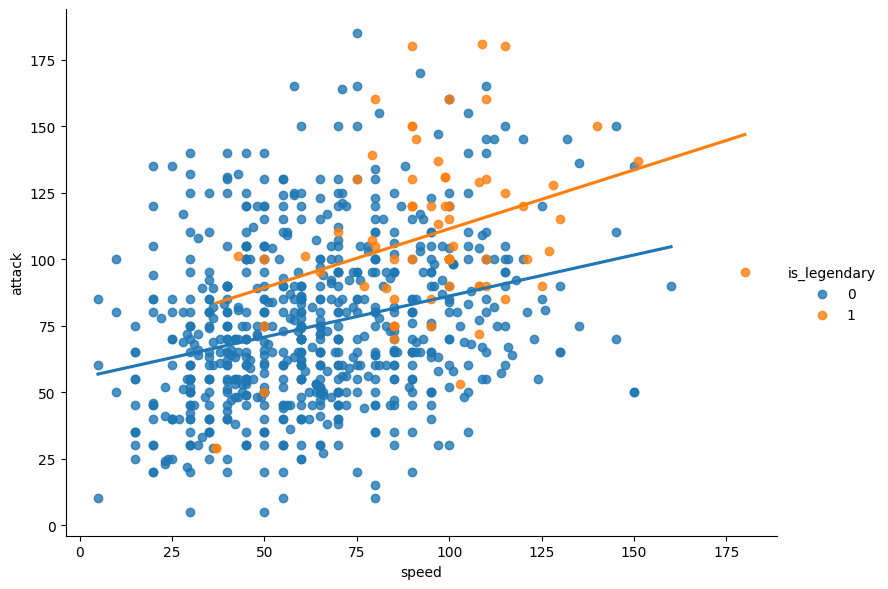

In [21]:
sns.lmplot(x = "speed", y = "attack", hue = 'is_legendary', ci = None, data=data, height = 6, aspect = 8/6)

That's all for now. Happy plotting!

### Reference


1. Kaggle
2. pandas.DataFrame.plot.scatter()
3. matplotlib.pyplot.scatter()
4. seaborn.scatterplot()
5. List of markers
6. List of color names